In [ ]:
pip install ucimlrepo

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

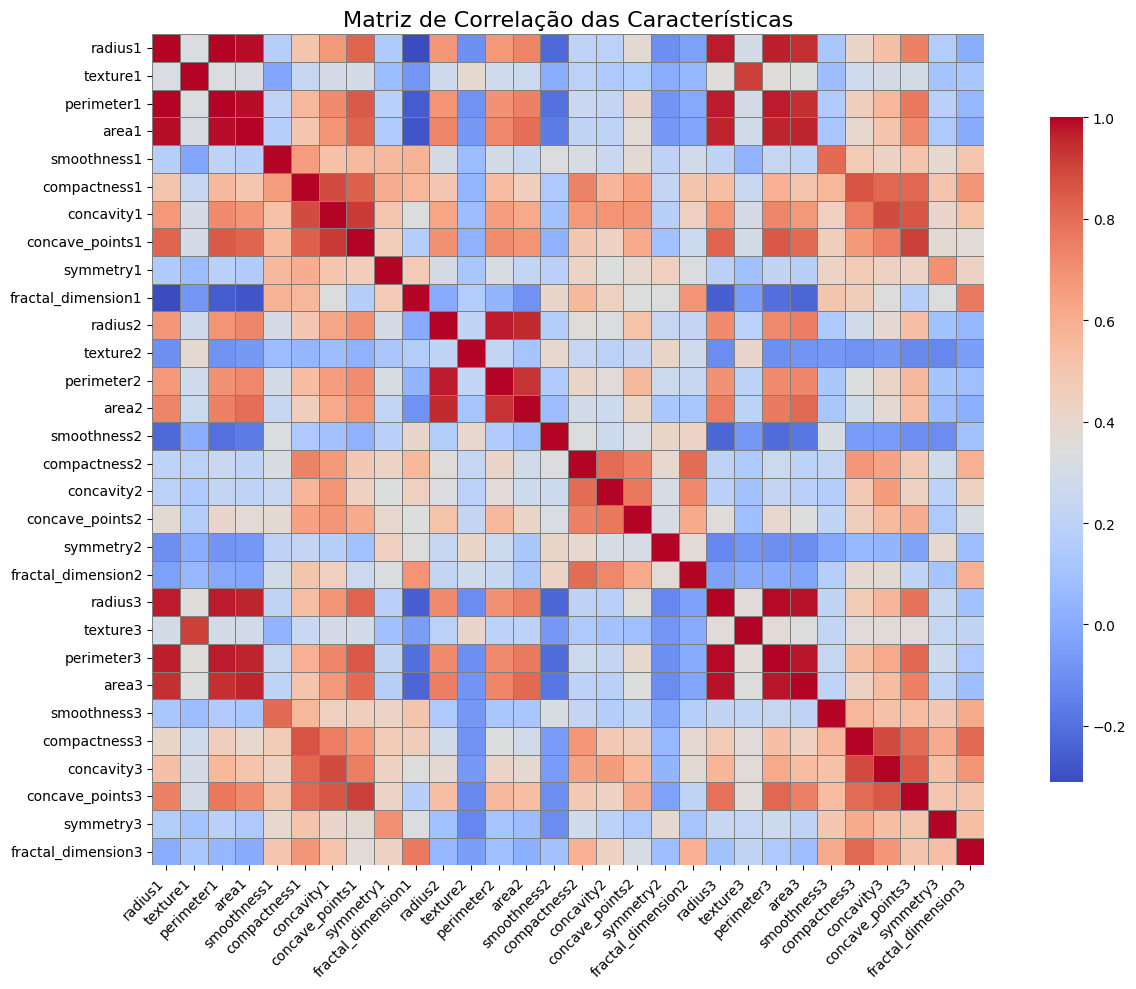

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Avaliação do Modelo de Regressão Logística:
[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Avaliação do Modelo de Random Forest:
[[70  1]
 [ 3 40]]
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



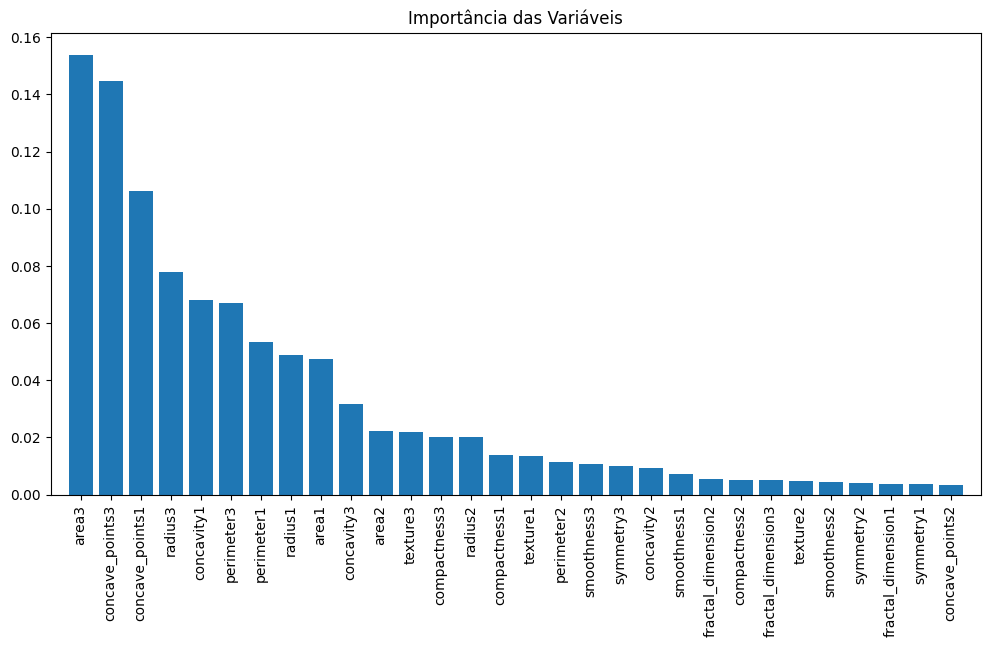

In [ ]:
# Importar a biblioteca necessária
from ucimlrepo import fetch_ucirepo

# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# 1. Importação de Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 2. Verificar colunas
print("\nColunas no DataFrame:")
print(X.columns.tolist())  # Aqui usamos X em vez de data

# 3. Pré-processamento dos Dados
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Análise Estatística
# Análise de correlação
correlation_matrix = pd.DataFrame(X).corr()

# Configurar a figura
plt.figure(figsize=(14, 10))

# Criar um mapa de calor com uma paleta de cores mais agradável
sns.heatmap(correlation_matrix,
            annot=False,  # Não mostrar os valores de correlação
            cmap='coolwarm',  # Paleta de cores
            square=True,  # Formato quadrado
            cbar_kws={"shrink": .8},  # Ajustar a barra de cores
            linewidths=0.5,  # Linhas entre os quadrados
            linecolor='gray')  # Cor das linhas

# Adicionar título e rótulos
plt.title('Matriz de Correlação das Características', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rótulos do eixo x
plt.yticks(rotation=0)  # Rótulos do eixo y
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

# 5. Modelagem Preditiva
# Regressão Logística
logistic_model = LogisticRegression(max_iter=1000)  # Aumentar max_iter se necessário
logistic_model.fit(X_train, y_train)

# Previsões
y_pred_logistic = logistic_model.predict(X_test)

# Avaliação do modelo de Regressão Logística
print("Avaliação do Modelo de Regressão Logística:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação do modelo de Random Forest
print("Avaliação do Modelo de Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 6. Visualização da Importância das Variáveis (Random Forest)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico de Importância das Variáveis
plt.figure(figsize=(12, 6))
plt.title("Importância das Variáveis")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()